**Mount Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import json
from time import time
import pickle
from keras.applications.vgg16 import VGG16
#from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.applications.resnet import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Dropout, Embedding, LSTM
#from tensorflow.keras.layers.merge import add
from tensorflow.keras.layers import concatenate

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn import svm
from IPython.display import display, HTML
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import re
import os
import sys
from numpy import mean,std
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
import itertools
from itertools import chain, product
from itertools import zip_longest
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Image Processing**

In [4]:
import os
import cv2

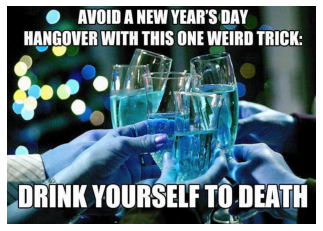

In [10]:
img1 = cv2.imread("/content/drive/MyDrive/Irony generation/Dataset/dataset_image/682716753374351360.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.axis("off")
plt.show()

**Vision Transformer**

In [5]:
#Transformer version 19
!pip install -q transformers

     |████████████████████████████████| 4.2 MB 7.3 MB/s 
     |████████████████████████████████| 84 kB 3.7 MB/s 
     |████████████████████████████████| 596 kB 54.3 MB/s 
     |████████████████████████████████| 6.6 MB 38.8 MB/s 


In [6]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image as img
import requests
from IPython.display import Image, display

In [7]:
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/68.0k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/330M [00:00<?, ?B/s]

In [8]:
image_array = '/content/drive/MyDrive/Irony generation/Dataset/dataset_image/682716753374351360.jpg'

In [9]:
gyan = cv2.imread("/content/drive/MyDrive/Irony generation/Dataset/dataset_image/682716753374351360.jpg")

In [10]:
inputs = feature_extractor(images = gyan, 
                           return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits

In [17]:
inputs

{'pixel_values': tensor([[[[-0.9843, -0.9843, -0.9843,  ..., -0.9529, -0.9451, -0.9451],
          [-0.9843, -0.9843, -0.9843,  ..., -0.9294, -0.9294, -0.9294],
          [-0.9843, -0.9843, -0.9843,  ..., -0.9294, -0.9137, -0.9137],
          ...,
          [-0.6471, -0.6784, -0.7098,  ..., -1.0000, -1.0000, -1.0000],
          [-0.7490, -0.8039, -0.8118,  ..., -1.0000, -1.0000, -1.0000],
          [-0.8118, -0.8353, -0.8353,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.9843, -0.9843, -0.9843,  ..., -0.9529, -0.9451, -0.9451],
          [-0.9843, -0.9843, -0.9843,  ..., -0.9294, -0.9294, -0.9294],
          [-0.9843, -0.9843, -0.9843,  ..., -0.9294, -0.9137, -0.9137],
          ...,
          [-0.2471, -0.2549, -0.3020,  ..., -1.0000, -1.0000, -1.0000],
          [-0.3490, -0.3961, -0.4275,  ..., -1.0000, -1.0000, -1.0000],
          [-0.4196, -0.4745, -0.5137,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.9843, -0.9843, -0.9843,  ..., -0.9529, -0.9451, -0.9451],
          [-0

In [16]:
outputs

ImageClassifierOutput([('logits',
                        tensor([[-5.4729e-01, -2.7589e-01, -6.5836e-01, -1.2136e+00, -9.4813e-01,
                                 -1.4022e+00, -2.3128e+00, -8.9768e-01, -1.5003e+00, -1.2552e-01,
                                 -6.1591e-01, -1.0605e+00, -2.7979e+00, -1.5125e+00, -1.8327e-01,
                                 -1.3878e+00, -9.9093e-01, -4.8689e-01, -9.2266e-01, -1.6880e+00,
                                 -7.5521e-01, -9.2631e-01, -1.2721e+00, -1.7337e+00, -8.2183e-01,
                                 -1.7537e+00, -1.4432e+00, -8.9039e-01, -7.9108e-01, -9.4871e-01,
                                 -9.1366e-01, -4.6170e-01, -1.0487e+00, -9.6203e-01, -1.9091e-01,
                                 -2.0620e+00, -5.0027e-01, -8.7593e-01, -1.2970e+00, -1.3671e+00,
                                 -9.6654e-01, -2.1017e+00, -1.6904e+00, -4.0086e-01, -2.3110e+00,
                                 -1.0890e+00, -1.9948e+00, -3.4948e-01, -1.9006e+00,

In [18]:
logits

tensor([[-5.4729e-01, -2.7589e-01, -6.5836e-01, -1.2136e+00, -9.4813e-01,
         -1.4022e+00, -2.3128e+00, -8.9768e-01, -1.5003e+00, -1.2552e-01,
         -6.1591e-01, -1.0605e+00, -2.7979e+00, -1.5125e+00, -1.8327e-01,
         -1.3878e+00, -9.9093e-01, -4.8689e-01, -9.2266e-01, -1.6880e+00,
         -7.5521e-01, -9.2631e-01, -1.2721e+00, -1.7337e+00, -8.2183e-01,
         -1.7537e+00, -1.4432e+00, -8.9039e-01, -7.9108e-01, -9.4871e-01,
         -9.1366e-01, -4.6170e-01, -1.0487e+00, -9.6203e-01, -1.9091e-01,
         -2.0620e+00, -5.0027e-01, -8.7593e-01, -1.2970e+00, -1.3671e+00,
         -9.6654e-01, -2.1017e+00, -1.6904e+00, -4.0086e-01, -2.3110e+00,
         -1.0890e+00, -1.9948e+00, -3.4948e-01, -1.9006e+00, -1.3502e+00,
         -1.4033e+00, -1.7256e-01, -3.2596e-01, -8.0738e-01, -4.3443e-01,
         -7.5277e-01, -1.2205e+00, -1.3470e+00, -2.1002e+00, -4.7292e-01,
          1.7073e-01, -6.1192e-01, -2.3390e-01, -1.0323e+00, -4.6409e-01,
         -1.0280e+00, -6.4656e-01, -3.

In [20]:
len(inputs), len(outputs), len(logits)

(1, 1, 1)

In [21]:
type(inputs), type(outputs), type(logits)

(transformers.feature_extraction_utils.BatchFeature,
 transformers.modeling_outputs.ImageClassifierOutput,
 torch.Tensor)

In [19]:
logits.shape

torch.Size([1, 1000])

In [11]:
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: book jacket, dust cover, dust jacket, dust wrapper


#**Demo**

**https://huggingface.co/docs/transformers/model_doc/vit**

In [30]:
from transformers import ViTFeatureExtractor, ViTForMaskedImageModeling
import torch
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
model = ViTForMaskedImageModeling.from_pretrained("google/vit-base-patch16-224-in21k")

num_patches = (model.config.image_size // model.config.patch_size) ** 2
pixel_values = feature_extractor(images=image, return_tensors="pt").pixel_values
# create random boolean mask of shape (batch_size, num_patches)
bool_masked_pos = torch.randint(low=0, high=2, size=(1, num_patches)).bool()

outputs = model(pixel_values, bool_masked_pos=bool_masked_pos)
loss, reconstructed_pixel_values = outputs.loss, outputs.logits
list(reconstructed_pixel_values.shape)

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/502 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/330M [00:00<?, ?B/s]

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForMaskedImageModeling: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing ViTForMaskedImageModeling from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForMaskedImageModeling from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForMaskedImageModeling were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['decoder.0.bias', 'embeddings.mask_token', 'decoder.0.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[1, 3, 224, 224]

In [ ]:
"""
from transformers import ViTFeatureExtractor, ViTForImageClassification
import torch
from datasets import load_dataset

dataset = load_dataset("huggingface/cats-image")
image = dataset["test"]["image"][0]

feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224")
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")

inputs = feature_extractor(image, return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

# model predicts one of the 1000 ImageNet classes
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])
"""

In [26]:
def encoding(img):
  inputs = feature_extractor(images = img, return_tensors="pt")
  outputs = model(**inputs)
  logits = outputs.logits
  return logits

In [28]:
def preprocess_image(img):
    img = image.load_img(img, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

In [ ]:
image = Image.open('/content/drive/MyDrive/Irony generation/Dataset/dataset_image/682716753374351360.jpg')
image

In [43]:
def encoding_image(image):
  inputs = feature_extractor(images = image, return_tensors="pt")
  with torch.no_grad():
    logits = model(**inputs).logits
  return logits

In [44]:
data = encoding_image(image)
data

tensor([[[[-0.1752,  0.1214, -0.0451,  ..., -0.0384, -0.1092,  0.0023],
          [ 0.1092,  0.1467,  0.1560,  ...,  0.2225,  0.0131, -0.0017],
          [-0.0723,  0.0177, -0.0738,  ...,  0.2507, -0.2313, -0.0255],
          ...,
          [ 0.1419, -0.0418,  0.0044,  ...,  0.0586, -0.0513, -0.1153],
          [ 0.0802,  0.1603, -0.0333,  ..., -0.0498, -0.1551, -0.0613],
          [ 0.0398, -0.0191, -0.0583,  ..., -0.1768, -0.0696,  0.0515]],

         [[-0.0004,  0.1072,  0.1125,  ..., -0.0246, -0.2321, -0.1840],
          [-0.1269,  0.0366, -0.0847,  ..., -0.0841, -0.1133, -0.0316],
          [ 0.0087,  0.0350, -0.0875,  ...,  0.0556,  0.0340,  0.0875],
          ...,
          [-0.0017,  0.1567, -0.1024,  ..., -0.1217, -0.0403,  0.0524],
          [ 0.0509,  0.0650, -0.0329,  ...,  0.1184, -0.0642,  0.0534],
          [ 0.0739, -0.1286,  0.0157,  ...,  0.1274, -0.1078,  0.0138]],

         [[ 0.1259, -0.0717, -0.1409,  ...,  0.1209, -0.2302,  0.0521],
          [-0.1288,  0.0463,  

In [46]:
def encd_image(image):
  inputs = feature_extractor(images = image, return_tensors="pt")
  with torch.no_grad():
    logits = model(**inputs).logits
  return logits


gyankumar = encd_image(Image.open('/content/drive/MyDrive/Irony generation/Dataset/dataset_image/682716753374351360.jpg'))
gyankumar

tensor([[[[-0.1752,  0.1214, -0.0451,  ..., -0.0384, -0.1092,  0.0023],
          [ 0.1092,  0.1467,  0.1560,  ...,  0.2225,  0.0131, -0.0017],
          [-0.0723,  0.0177, -0.0738,  ...,  0.2507, -0.2313, -0.0255],
          ...,
          [ 0.1419, -0.0418,  0.0044,  ...,  0.0586, -0.0513, -0.1153],
          [ 0.0802,  0.1603, -0.0333,  ..., -0.0498, -0.1551, -0.0613],
          [ 0.0398, -0.0191, -0.0583,  ..., -0.1768, -0.0696,  0.0515]],

         [[-0.0004,  0.1072,  0.1125,  ..., -0.0246, -0.2321, -0.1840],
          [-0.1269,  0.0366, -0.0847,  ..., -0.0841, -0.1133, -0.0316],
          [ 0.0087,  0.0350, -0.0875,  ...,  0.0556,  0.0340,  0.0875],
          ...,
          [-0.0017,  0.1567, -0.1024,  ..., -0.1217, -0.0403,  0.0524],
          [ 0.0509,  0.0650, -0.0329,  ...,  0.1184, -0.0642,  0.0534],
          [ 0.0739, -0.1286,  0.0157,  ...,  0.1274, -0.1078,  0.0138]],

         [[ 0.1259, -0.0717, -0.1409,  ...,  0.1209, -0.2302,  0.0521],
          [-0.1288,  0.0463,  

In [50]:
def encd1_image(image):
  inputs = feature_extractor(images = image, return_tensors="tf")
  with torch.no_grad():
    logits = model(**inputs).logits
  return logits


kumar = encd1_image(cv2.imread('/content/drive/MyDrive/Irony generation/Dataset/dataset_image/682716753374351360.jpg'))
kumar

TypeError: ignored

In [51]:
def encd2_image(image):
  inputs = feature_extractor(images = image, return_tensors="np")
  with torch.no_grad():
    logits = model(**inputs).logits
  return logits


kumar = encd2_image(cv2.imread('/content/drive/MyDrive/Irony generation/Dataset/dataset_image/682716753374351360.jpg'))
kumar

TypeError: ignored